In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

## Step 0. (Data)

(0.0, 2.7575)

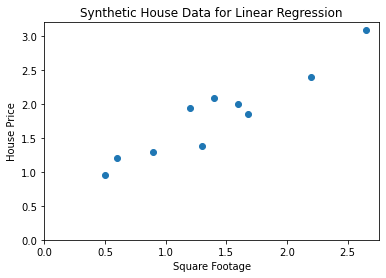

In [2]:
square_footage = np.array([0.5, 0.6, 0.9, 1.2, 1.3, 1.4, 1.6, 1.68, 2.2, 2.65])
price = np.array([0.95, 1.2, 1.29, 1.95, 1.38, 2.09, 2, 1.85, 2.4, 3.1 ])
x_train = square_footage
y_train = price

plt.scatter(x_train, y_train)
plt.title('Synthetic House Data for Linear Regression')
plt.xlabel('Square Footage')
plt.ylabel('House Price')
plt.ylim(bottom=0)
plt.xlim(left=0)

In [3]:
def kernel1_gaussian(x, x_hat, L):
    diff = x - x_hat                   # Element-wise subtraction
    norm_squared = np.sum(diff**2)        # Euclidean norm 
    return np.exp(-L * norm_squared)           # Exponential

![1](1.png) 

In [4]:
def kernel2_laplace(x, x_hat, L):
    diff = x - x_hat
    norm_squared = np.sum(diff**2)
    return np.exp(-L * np.sqrt(norm_squared))

![2](2.png)


## Step 1.

![3](3.png)

In [5]:
def kernel_matrix(n, x, kernel_func, L):               # Function to compute the kernel matrix
    K_hat = np.zeros((n, n))           # Could just use len(x_train)
    for i in range(n):
        for j in range(n):
            K_hat[i, j] = kernel_func(x_train[i], x_train[j], L)
    return K_hat

In [6]:
L = [0.5, 20, 100]

K_hat_gaussian1 = kernel_matrix(10, x_train, kernel1_gaussian, L[0])
K_hat_gaussian2 = kernel_matrix(10, x_train, kernel1_gaussian, L[1])
K_hat_gaussian3 = kernel_matrix(10, x_train, kernel1_gaussian, L[2])

K_hat_laplace1 = kernel_matrix(10, x_train, kernel2_laplace, L[0])
K_hat_laplace2 = kernel_matrix(10, x_train, kernel2_laplace, L[1])
K_hat_laplace3 = kernel_matrix(10, x_train, kernel2_laplace, L[2])

## Step 2.

![4](4.png)

In [7]:
# Solve for the coefficient vector alpha
alpha_gaussian1 = np.linalg.solve(K_hat_gaussian1, y_train)
alpha_gaussian2 = np.linalg.solve(K_hat_gaussian2, y_train)
alpha_gaussian3 = np.linalg.solve(K_hat_gaussian3, y_train)

alpha_laplace1 = np.linalg.solve(K_hat_laplace1, y_train)
alpha_laplace2 = np.linalg.solve(K_hat_laplace2, y_train)
alpha_laplace3 = np.linalg.solve(K_hat_laplace3, y_train)

alpha_gaussian_list = [alpha_gaussian1, alpha_gaussian2, alpha_gaussian3]
alpha_laplace_list = [alpha_laplace1, alpha_laplace2, alpha_laplace3]

## Step 3.

![5](5.png)

In [8]:
def kernel_pred(x_train, alpha, kernel_func, L, x_new):            # function implementation of step 3: first fill the kernel_vector K_hat with a combination of K(old_datapoint, new datapoint) for each old_datapoint
    kernel_vector = np.zeros((len(x_train)))                       # then solve for alpha*kernel_vector
    
    for i in range(len(x_train)):
        kernel_vector[i] = kernel_func(x_train[i], x_new, L)
    return np.dot(alpha, kernel_vector)

In [9]:
x_new = 1.0

prediction_gaussian1 = kernel_pred(x_train, alpha_gaussian1, kernel1_gaussian, L[0], x_new)
prediction_gaussian2 = kernel_pred(x_train, alpha_gaussian2, kernel1_gaussian, L[1], x_new)
prediction_gaussian3 = kernel_pred(x_train, alpha_gaussian3, kernel1_gaussian, L[2], x_new)

prediction_laplace1 = kernel_pred(x_train, alpha_laplace1, kernel2_laplace, L[0], x_new)
prediction_laplace2 = kernel_pred(x_train, alpha_laplace2, kernel2_laplace, L[1], x_new)
prediction_laplace3 = kernel_pred(x_train, alpha_laplace3, kernel2_laplace, L[2], x_new)

print("Prediction (Gaussian, L=0.5):", prediction_gaussian1)
print("Prediction (Gaussian, L=20):", prediction_gaussian2)
print("Prediction (Gaussian, L=100):", prediction_gaussian3)

print("\nPrediction (Laplace, L=0.5):", prediction_laplace1)
print("Prediction (Laplace, L=20):", prediction_laplace2)
print("Prediction (Laplace, L=100):", prediction_laplace3)

Prediction (Gaussian, L=0.5): 4.12451171875
Prediction (Gaussian, L=20): 2.3069890030550226
Prediction (Gaussian, L=100): 0.5100861851150078

Prediction (Laplace, L=0.5): 1.5060508695424781
Prediction (Laplace, L=20): 0.2095865809189182
Prediction (Laplace, L=100): 5.8569928643161034e-05


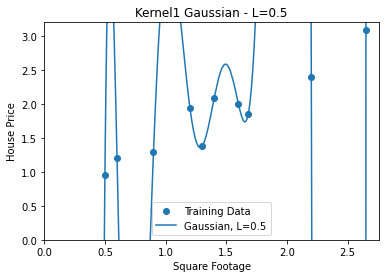

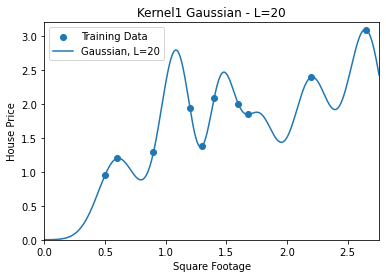

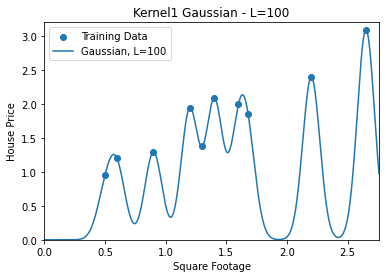

In [10]:
# Plot each kernel solution on a separate plot
for i, l_value in enumerate(L):
    plt.figure(i + 1)  # Create a new figure for each plot
    
    plt.scatter(x_train, y_train, label='Training Data')
    plt.title(f'Kernel1 Gaussian - L={l_value}')
    plt.xlabel('Square Footage')
    plt.ylabel('House Price')
    plt.ylim(bottom=0)
    plt.xlim(left=0)

    x_range = np.linspace(0, max(x_train)+np.mean(x_train), 10000)        # 10000 datapoints between 0 and max(x_train)+mean of x_train
    y_pred = [kernel_pred(x_train, alpha_gaussian_list[i], kernel1_gaussian, l_value, x) for x in x_range] # pred for all points defined above

    plt.plot(x_range, y_pred, label=f'Gaussian, L={l_value}')
    plt.legend()

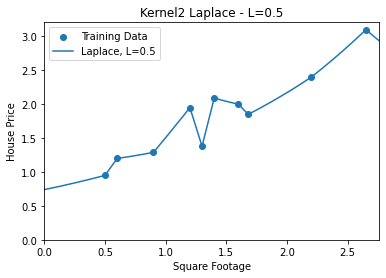

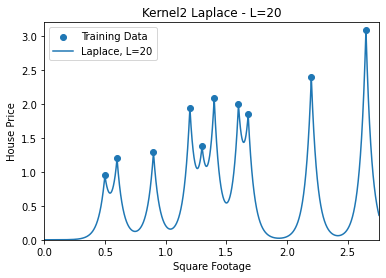

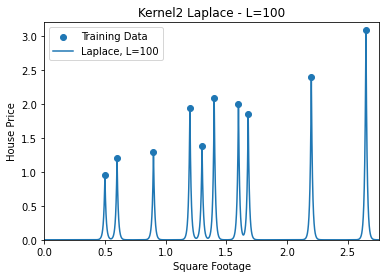

In [11]:
# Plot each kernel solution on a separate plot
for i, l_value in enumerate(L):
    plt.figure(i + 1)  # Create a new figure for each plot
    
    plt.scatter(x_train, y_train, label='Training Data')
    plt.title(f'Kernel2 Laplace - L={l_value}')
    plt.xlabel('Square Footage')
    plt.ylabel('House Price')
    plt.ylim(bottom=0)
    plt.xlim(left=0)

    x_range = np.linspace(0, max(x_train)+np.mean(x_train), 10000)
    y_pred = [kernel_pred(x_train, alpha_laplace_list[i], kernel2_laplace, l_value, x) for x in x_range]

    plt.plot(x_range, y_pred, label=f'Laplace, L={l_value}')
    plt.legend()